![](https://snag.gy/h9Xwf1.jpg)

### Lesson Guide

- What is `pandas`?
- Reading data
- Exploring data
    - Filtering
    - Sorting
- Split-Apply-Combine
- Missing Values

<a id='introduction'></a>

### What is `pandas`?

---

- Data analysis library - **Panel data system** (doesn't actually have to do with the animal, sorry).
- Created by Wes McKinney and Open Sourced by AQR Capital Management, LLC 2009.
- Implemented in highly optimized Python/Cython.
- Most ubiquitous tool used to start data analysis projects within the Python scientific ecosystem.


### Pandas Use Cases

---

- Cleaning data / Munging
- Exploratory Data Analysis (EDA)
- Structuring data for plots or tabular display
- Joining disparate sources
- Filtering, extracting, or transforming

## Importing the Dynamic Trio
From here on out, we'll begin pretty much all of our notebooks with the following three imports.

* **pandas**: The library we'll be using to do pretty much all data manipulation.
* **numpy**: The library we'll need to do various other computations. Even if you don't think you'll need it to start, you'll probably end up using it later.
* **matplotlib**: The library we'll use most for plotting. More on this another day.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# pandas library if you want to know about all the library/modules/functions/classes
# https://pandas.pydata.org/docs/index.html
#or if you are the go you can view a bit of the documentation like this on jupyter labs (also applies in environments in google colab and spyder):
pd.

<a id='loading_csvs'></a>

### Loading a csv into a DataFrame

---

Pandas can load many types of files, but one of the most common filetypes for storing data is in a `.csv` file. Let's load a dataset on UFO sightings from the `./datasets` directory:

In [39]:
#-----------------------------
#Load in your dataset
ufo = pd.read_csv('datasets/ufo.csv')

This creates a pandas object called a **DataFrame**. These are powerful containers for data with many built-in functions to explore and manipulate data.

We will barely scratch the surface of DataFrame functionality in this lesson, but over the course of this class you will become an expert at using them.

<a id='exploring_data'></a>

## Exploratory Data Analysis (EDA) with Python!

---

DataFrames come with built-in functionality that makes data exploration easy.

Let's start by looking at the "head" of your data with the `.head()` built-in function. If run alone in a notebook cell, it will show you the first and last handful of columns and the first 5 rows.

In [6]:
#-----------------------------------------


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


If we want to see the last part of our data, we can equivalently use the ```.tail()``` function.

In [10]:
#---------------------------------------


,City,Colors Reported,Shape Reported,State,Time
80531,Abingdon,NaN,CIRCLE,VA,9/4/2014 22:05
80532,Lawrence,NaN,LIGHT,MA,9/4/2014 22:15
80533,Melbourne,NaN,OVAL,IA,9/4/2014 22:15
80534,Burleson,NaN,LIGHT,TX,9/4/2014 22:30
80535,Elizabethtown,NaN,CIRCLE,KY,9/4/2014 22:30
80536,Wyoming,RED,DISK,PA,9/4/2014 23:00
80537,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40


<a id='data_dimensions'></a>

### Data dimensions

---

It's good to look at what the dimensions of your data are. The ```.shape``` property will tell you the rows and colum counts of your DataFrame.

In [6]:
#------------------


`/poll "In terms of rows, is this the largest dataset you've ever worked with?" "Yes" "No" "Not sure, but I'm not impressed anyway" anonymous limit 1`

You will notice that this is operates the same as `.shape` for numpy arrays/matricies. Pandas makes use of numpy under the hood for optimization and speed.

Look at the names of your columns with the ```.columns``` property.

In [8]:
#----------------


Accessing a specific column is easy. You can use the bracket syntax just like python dictionaries with the string name of the column to extract that column.

In [10]:
#------------------------------
#One method....


In [12]:
#Another method...


In [14]:
#Another......


As you can see we can also use the ```.head()``` function on a single column, which is represented as a pandas Series object.

You can also access a column (as a DataFrame instead of a Series) or multiple columns with a list of strings.

In [16]:
#-------------------
#try slicing your data frame:


<a id='dataframe_series'></a>

### DataFrame vs. Series

---

We've been playing with them, so I guess we should define them formally:

* A **`Series`** is a one-dimensional array of values **with an index**.
* A **`DataFrame`** is a two-dimensional array of values **with both a row and column index**.
* It turns out - each column of a `DataFrame` is actually a `Series`!

![](./assets/series-vs-df.png)

There is an important difference between using a list of strings and just a string with a column's name: when you use a list with the string it returns another **DataFrame**, but when you use just the string it returns a pandas **Series** object.

In [18]:
#print out the type: series vs dataframe


<a id='info'></a>

### Examining your data with `.info()`

---

The `.info()` should be the first thing you look at when getting acquainted with a new dataset.

**Types** are very important.  They impact the way data will be represented in our machine learning models, how data can be joined, whether or not math operators can be applied, and when you can encounter unexpected results.

> _Typical problems when working with new datasets_:
> - Missing values
> - Unexpected types (string/object instead of int/float)
> - Dirty data (commas, dollar signs, unexpected characters, etc)
> - Blank values that are actually "non-null" or single white-space characters

`.info()` is a function that is available on every **DataFrame** object. It gives you information about:

- Name of column / variable attribute
- Type of index (RangeIndex is default)
- Count of non-null values by column / attribute
- Type of data contained in column / attribute
- Unqiue counts of dtypes (Pandas data types)
- Memory usage of our dataset


In [26]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             80492 non-null  object
 1   Colors Reported  17034 non-null  object
 2   Shape Reported   72141 non-null  object
 3   State            80543 non-null  object
 4   Time             80543 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


<a id='describe'></a>

## Quick Summaries

---

The `.describe()` function is very useful for taking a quick look at your data. It gives you some of the basic descriptive statistics.

You can use `.value_counts()` to get a good tabular view of a categorical variable.

In [35]:
# Let's read in the diamonds data set.
diamonds = pd.read_csv("datasets/diamonds.csv")

In [21]:
# Let's describe the price--------


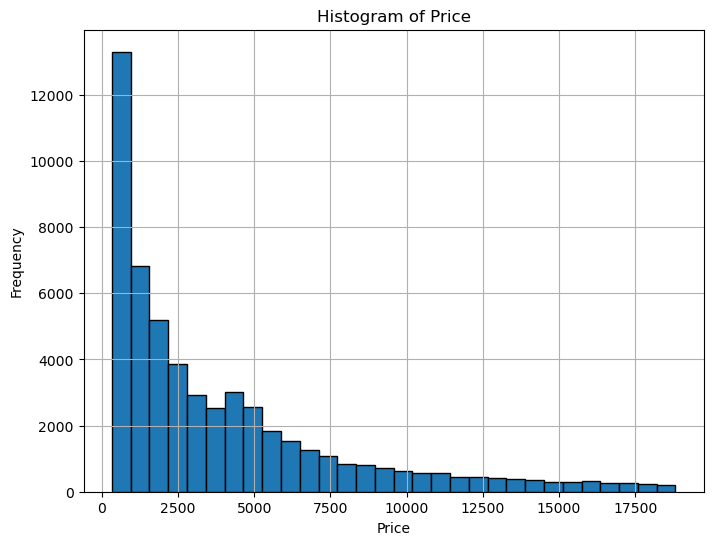

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(diamonds['price'], bins=30, edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
#About 13k+ 'prices' of diamonds fall within the first box (or bin)

In [23]:
# We can even do it to the whole DataFrame - what does that look like?------

In [25]:
# Let's count up the cuts-----


In [27]:
# Let's do the same thing, but normalized-----

```.describe()``` gives us these statistics:

- **count**, which is equivalent to the number of cells (rows)
- **mean**, the average of the values in the column
- **std**, which is the standard deviation
- **min**, the minimum value
- **25%**, the 25th percentile of the values
- **50%**, the 50th percentile of the values, which is the equivalent to the median
- **75%**, the 75th percentile of the values
- **max**, the maximum value

There are built-in math functions that will work on all of the columns of a DataFrame at once, or subsets of the data.

I can use the `.mean()` function on the `diamonds` DataFrame to get the mean for every column.

In [45]:
#-------------------------


<a id='independent_practice'></a>

### Now you!

---

Now that we know a little bit about basic DataFrame use, let's practice on a new dataset.

> Pro tip:  You can use the "tab" key to browse filesystem resources when your cursor is in a string to get a relative reference to the files that can be loaded in Jupyter notebook.  Remember, you have to use your arrow keys to navigate the files populated in the UI.

<img src="https://snag.gy/IlLNm9.jpg">

1. Read in the `cars.csv` dataset. (call it `cars`)
1. What is the mean `mpg` for cars in this dataset?

In [47]:
#-------------------------------
cars = 

**Give me the first few rows of the data:**

In [49]:
#--------------------


**Give me the last few rows of the data:**

In [51]:
#---------------------


## Filtering
We usually don't need to operate on the _whole_ dataset. A very common task is to parse it down to only the pieces we need.

Filtering in pandas uses vectors of booleans to describe inclusion or exclusion. `True` means you're in, `False` means you're out.

### Multiple Filters
Often we want to filter based on multiple conditions. We can use the usual "and" and "or" logic, but the symbols change for mystical Python reasons.

### Now you:

In [67]:
#----------------------
# Show me all the UFO sightings in your hometown! (City and State)
# Anything interesting?
# For us, how would the syntax look when we just want to look at ufo data in
#'Los Angeles', 'CA'


### Aside: Some shortcuts

In [76]:
#filter to find stuff with certain letters


<a id='indexing'></a>

## Pandas Indexing: `.loc` and `.iloc`

---

So far we've learned how to select both rows and columns. The savvy and skeptical student would have noticed a problem here. We have ambiguous notation! What does this do:

```python
data[something]
```

We can't tell! Is `something` a mask or a string? One selects rows, the other selects columns. **What if we wanted to filter rows and select columns at the same time?!**

Pandas has two properties that you can use for indexing:

- **`.loc`** indexes with the _labels_ for rows and columns axis.
- **`.iloc`** indexes with the _integer positions_ for rows and columns axis.
> There used to be a third, `.ix` which is now deprecated and shan't ever be used again.

## `.loc` is Most Common
The syntax of `.loc` is pretty intuitive:

```python
data.loc[rows, columns]
```

Where `rows` is often a filter (ie, a **mask**), and `columns` is a list of columns, or even just `:` to select all columns.

In [ ]:
ufo = pd.read_csv('datasets/ufo.csv')

In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufo.loc[ufo['State'] == 'TX',['City','Shape Reported']   ]

,City,Shape Reported
37,Dallas,SPHERE
43,Alice,DISK
49,Conroe,OTHER
92,Borger,DISK
114,Post,DISK
...,...,...
80287,Lago Vista,TRIANGLE
80350,Houston,TRIANGLE
80414,Eustace,LIGHT
80476,Fort Worth,OTHER


In [ ]:
#What if we dont want our whole dataframe but part of it? 
# The ':' in the first part is saying to grab ALL the ROWS in the dataframe

In [ ]:
#--------------------------------------------

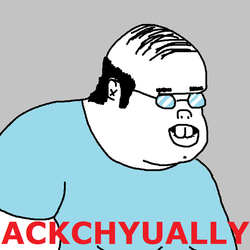

### Acccctually.....
![](/content/drive/MyDrive/Classroom/2.01-intro-to-pandas/assets/actually.png)
According to **_The Zen of Python_**, explicit is better than implicit. `.loc` is explicit. **Most people choose to always use `.loc` instead of the ambiguous `data[something]` notation! This is a pretty good idea! When in doubt, use `.loc`!**

### `.iloc` is rare, but useful
The `i` stands for "integer" and will give you the actual zero-indexed numerical indices.

In [ ]:
cars.iloc[:5, : ] #for the rows i want to see first 5 nad columns i want to see all of em

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
#or
cars.iloc[10:20, 1:3 ]

,cyl,disp
10,6,167.6
11,8,275.8
12,8,275.8
13,8,275.8
14,8,472.0
15,8,460.0
16,8,440.0
17,4,78.7
18,4,75.7
19,4,71.1


In [ ]:
#single observation:
cars.iloc[10:11, 1:2]

,cyl
10,7


In [ ]:
cars.iloc[5:12,:]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,18.1,6,225.0,105,2.76,3.46,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.19,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.15,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.44,18.30,1,0,4,4
10,17.8,7,167.6,123,3.92,3.44,18.90,1,0,4,4
11,16.4,8,275.8,180,3.07,4.07,17.40,0,0,3,3


## Sorting

In [ ]:
# We can sort individual Series...

In [84]:
# Or the entire DataFrame


### Now You:

In [86]:
ufo['Time'].head()

0     6/1/1930 22:00
1    6/30/1930 20:00
2    2/15/1931 14:00
3     6/1/1931 13:00
4    4/18/1933 19:00
Name: Time, dtype: object

In [88]:
#This is formatting my datetime to something nicer
ufo.Time = pd.to_datetime(ufo.Time)

In [90]:
ufo['Time'].head()

0   1930-06-01 22:00:00
1   1930-06-30 20:00:00
2   1931-02-15 14:00:00
3   1931-06-01 13:00:00
4   1933-04-18 19:00:00
Name: Time, dtype: datetime64[ns]

**Give me the 5 most recent UFO sightings in Roswell, New Mexico.
You'll need to filter and use .sort_values()
This is a hard one!**

In [93]:
#-----------------------------------
# Mask method


In [95]:
# .loc method


## Split-Apply-Combine

---

What if we want summary statistics _with respect to some categorical variable?_ For example, the price of a diamond probably varies widely between different diamond cuts. To tackle this problem, we'll use the **Split-Apply-Combine** technique. (This is sometimes called **MapReduce**, but is more of a special case of MapReduce).

* **Split**: Separate your data into different DataFrames, one for each category.
* **Apply**: On each split-up DataFrame, apply some function or transformation (for example, the mean).
* **Combine**: Take the results and combine the split-up DataFrames back into one aggregate DataFrame.

This might sound complicated, but it's actually only two commands in pandas (the **Combine** step is done for us).

In [97]:
# What is the mean price by diamond cut?


In [99]:
# Can we just describe each price by cut?


**std (Standard Deviation):** The amount of variation or dispersion from the mean. A higher standard deviation indicates that data points are more spread out from the mean.

**25% (First Quartile/Q1):** This is the value below which 25% of the data fall. It is the first quartile of your data, meaning 25% of the observations have values less than this point.

**50% (Median or Second Quartile/Q2):** This is the median of your data, indicating that 50% of observations are below this value and 50% are above. It is the central point of your data distribution.

**75% (Third Quartile/Q3):** This is the value below which 75% of the data fall. It shows that 75% of your data points are less than this value.

In [116]:
#.T does some pivoting or TRANSPOSE

### Now You:
What is the mean miles per gallon for each cylinder size?

In [118]:
#----------------------------


First snippet **cars.groupby('cyl').mean()['mpg']**:

This code groups the DataFrame cars by the column 'cyl', calculates the mean of all numeric columns for each group, and then selects the 'mpg' column to show the mean values of miles per gallon (mpg) for each group.
Essentially, it computes the mean of all columns first and then extracts the 'mpg' column from the result.


Second snippet **cars.groupby('cyl')['mpg'].mean()**:

This code groups the DataFrame cars by the column 'cyl' and directly selects the 'mpg' column. It then calculates the mean of the 'mpg' values for each group.
This is a more direct approach, as it only calculates the mean for the 'mpg' column without calculating the mean for other numeric columns.

Key Difference:
- First snippet: Computes the mean for all numeric columns first and then selects 'mpg'.
- Second snippet: Directly computes the mean for the 'mpg' column without calculating the mean for other columns.

Both snippets ultimately provide the same result for 'mpg', but the first one does more work by calculating the mean for other numeric columns, even if you're only interested in 'mpg'. The second approach is more efficient if you only need the mean of one column.

In [87]:
# class stop-----------------------------------

## Adding, Dropping, Renaming, and `inplace` Methods

In [123]:
# Adding a column is easy, just define it!
# What if I wanted km per gal instead of miles per gal?


In [125]:
# Oops - that actually doesn't make sense since they'd be using liters anyway.
# Let's drop it.


In [ ]:
# But... it's not gone?

In [127]:
#we didnt actually delete the kmpg column... we didnt access memory

###  Inplace Methods!
There are several methods in pandas that don't "stick" unless you tell them to. These methods will always have `inplace=False` by default. If you want to run a method and have it "stick" - assign `inplace=True`.

For example...

### Renaming Columns

In [33]:
# Yuck - I hate spaces and capital letters
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
# Lowercaseifying is easy:
# The "columns" attribute of a DataFrame works just like a numpy array or Series.

In [ ]:
ufo.columns = ufo.columns.str.lower()

In [ ]:
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [ ]:
# The .rename method

In [ ]:
ufo.rename(columns = {
    'colors reported' : 'colors',
    'shape reported' : 'shape'
}, inplace=True)
#inplace means 'Save my work'
#specify columns and the change the columns name you want to do..once you see the correct output set the 'inplace=True'

### Aside: `str` and `dt` methods
There are a lot of familiar string and date operations we can perform on columns. Strangely, they exist within a pandas submodule and so have to be prefixed with `str` and `dt` respectively.

In [ ]:
ufo['shape'].str.lower().head()

0    triangle
1       other
2        oval
3        disk
4       light
Name: shape, dtype: object

In [ ]:
ufo['shape'].str.replace('O', 'BRO').head()

0    TRIANGLE
1     BROTHER
2      BROVAL
3        DISK
4       LIGHT
Name: shape, dtype: object

In [ ]:
# We already did this above, but datetime variables need to be converted specially.
# ufo['time'] = pd.to_datetime(ufo['time'])
ufo['time'].dt.year.head()

## Missing Values

In [36]:
s = pd.Series([5, 7, np.nan, 2, 10])

In [ ]:
s

0     5.0
1     7.0
2     NaN
3     2.0
4    10.0
dtype: float64

In [ ]:
# Hmm...
s == np.nan

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [ ]:
s.isnull()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [37]:
s.notnull()

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [ ]:
s.isnull().sum()

1

In [ ]:
ufo.isnull().sum() #sum ftn will gives a count of the missing data 

city                  0
colors            63509
shape reported     8402
state                 0
time                  0
dtype: int64

In [38]:
ufo.isnull().head()

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [ ]:
#on the oppposite end

In [ ]:
ufo.notnull().sum()

city              80543
colors            17034
shape reported    72141
state             80543
time              80543
dtype: int64

In [ ]:
ufo.isna().sum()

city                  0
colors            63509
shape reported     8402
state                 0
time                  0
dtype: int64

In [ ]:
ufo.isna().mean()

city              0.000000
colors            0.788510
shape reported    0.104317
state             0.000000
time              0.000000
dtype: float64

In [ ]:
# Easy way to filter out missings!
ufo.loc[ufo['colors'].notnull(),:].head()

,city,colors,shape reported,state,time
12,Belton,RED,SPHERE,SC,1939-06-30 20:00:00
19,Bering Sea,RED,OTHER,AK,1943-04-30 23:00:00
36,Portsmouth,RED,FORMATION,VA,1945-07-10 01:30:00
44,Blairsden,GREEN,SPHERE,CA,1946-06-30 19:00:00
66,Wexford,BLUE,NaN,PA,1947-07-01 20:00:00


## Exporting Data
We can read data, but how do we save it so we can send it out? pandas has several methods of the form `.to_*()`.

In [ ]:
ufo.to_csv('ufo.csv')

<a id='review'></a>

### Review

---

 - What would we do with a dataset when we first acquire it?
 - What's important to consider when first looking at a dataset?
 - What are some common problems we can run into with new data?
 - What are some common operations with DataFrames?
 - How do we slice? Index? Filter?

# EXTRA MATERIALS
![](assets/biohazard.png)
Everything that follows is considered advanced or "too much" for our first session with pandas, and may not be explicitly covered by the instructor. If the instructor _does_ cover it, please don't worry that you don't understand this on your first pass.

**THAT DOES NOT MEAN THESE TOPICS ARE UNIMPORTANT OR RARELY USED!** We highly _highly_ recommend you take a look at these on your own time.

### Merging

In [ ]:
movies = pd.read_csv(
    'datasets/movies.tbl',
    sep='|',
    encoding='latin1',
    header=None,
    names=['movie_id', 'title'],
    usecols=[0, 1]
)
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
print('Hello')

Hello


In [ ]:
ratings = pd.read_csv(
    'datasets/movie_ratings.tsv',
    sep='\t',    # \t represents a tab
    header=None,
    names=['user_id', 'movie_id', 'rating', 'timestampzz']  #naming the headers from lef tto right ordered this way
)
ratings.head()

,user_id,movie_id,rating,timestampzz
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
movie_reviews = pd.merge(ratings, movies, how='left')
movie_reviews.head()

,user_id,movie_id,rating,timestampzz,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [ ]:
print(movies.shape)
print(ratings.shape)
print(movie_reviews.shape)

(1682, 2)
(100000, 4)
(100000, 5)


In [ ]:
movie_reviews1 = pd.merge(ratings, movies, how='inner')
movie_reviews.head()

,user_id,movie_id,rating,timestampzz,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


### "Categorical" Variables
Despite the name, when pandas says "Categorical", they really mean "Ordinal" - that is, ordered categories.

For example, check out the following crosstab:

In [ ]:
diamonds = pd.read_csv('datasets/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
pd.crosstab(diamonds['cut'], diamonds['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


The "cuts" are not in the right order! They're actually in alphabetical order. We can fix this by telling pandas that there really is an important ordering here.

In [ ]:
diamonds['cut'] = pd.Categorical(diamonds['cut'], categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
pd.crosstab(diamonds['cut'], diamonds['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Very Good,1513,2400,2164,2299,1824,1204,678
Premium,1603,2337,2331,2924,2360,1428,808
Ideal,2834,3903,3826,4884,3115,2093,896


### Categorizing with `.map()`

In [ ]:
cars = pd.read_csv('datasets/cars.csv')
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
cars.tail()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [ ]:
cars['cyl_word'] = cars['cyl'].map({4: 'Four', 6: 'Six', 8: 'Eight'})
cars['cyl_word'].value_counts()

Eight    14
Four     11
Six       7
Name: cyl_word, dtype: int64

In [ ]:
def is_efficient(x):
    if x > 20:
        return "Efficient"
    else:
        return "Wasteful"

cars['fuel_economy'] = cars['mpg'].map(is_efficient)
cars['fuel_economy'].value_counts()

Wasteful     18
Efficient    14
Name: fuel_economy, dtype: int64

In [ ]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fuel_economy
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Efficient
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Efficient
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Efficient
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Efficient
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Wasteful


### Advanced Data Manipulation with `.apply()`
The `.apply()` method is very similar to `.map()`, except more advanced. You can apply a function along any axis of a `DataFrame`. `.apply()` is our "Swiss army knife" for data manipulation - if something can't be solved with ordinary means, it might be time for a `.apply()`.

In [ ]:
sizes = pd.Series([8, 4, 5, 'L', 2, 12, 16, 8, 'XL'])
sizes

0     8
1     4
2     5
3     L
4     2
5    12
6    16
7     8
8    XL
dtype: object

In [ ]:
def to_num(x):
    try:
        out = float(x)
    except:
        out = np.nan
    return out

In [ ]:
sizes.apply(to_num)

0     8.0
1     4.0
2     5.0
3     NaN
4     2.0
5    12.0
6    16.0
7     8.0
8     NaN
dtype: float64

In [ ]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fuel_economy
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Efficient
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Efficient
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Efficient
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Efficient
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Wasteful


In [ ]:
def describe_car(row):
    efficiency = row['fuel_economy'].lower()
    #cyl = row['cyl'].lower()   #editing row ['cyl_word'] to cyl
    auto = 'automatic' if row['am'] == 1 else 'manual'
    print(f"This cyl cylinder car has {auto} transmission and a(n) {efficiency} fuel economy.")

In [ ]:
cars.head().apply(describe_car, axis=1)

This cyl cylinder car has automatic transmission and a(n) efficient fuel economy.
This cyl cylinder car has automatic transmission and a(n) efficient fuel economy.
This cyl cylinder car has automatic transmission and a(n) efficient fuel economy.
This cyl cylinder car has manual transmission and a(n) efficient fuel economy.
This cyl cylinder car has manual transmission and a(n) wasteful fuel economy.


0    None
1    None
2    None
3    None
4    None
dtype: object

BONUS QUESTION: Why are there 5 "None" valus in the above output?